In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math

In [36]:
#read in this data data/processed-labels/labels_full_features_seattle.csv
labels = pd.read_csv('data/processed-labels/labels_full_features_seattle.csv')
gt = pd.read_csv('data/processed-labels/test_set_seattle.csv')


In [41]:
#select verified ==1
correct = gt[gt['verified'] == 1]
incorrect = gt[gt['verified'] == 0]


In [110]:
unclassified = gt[gt['way_type'] == 'unclassified']
unclassified

,label_id,label_type,severity,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,lat,lng,geometry,cluster_id,clustered,cluster_label_count,way_type,distance_to_road,distance_to_intersection,tag,tag_count,description,verified
58,202273,Obstacle,3.0,JPjXGP8OgvFAY7t5BGMo4w,1,145.687500,-24.500000,12.211825,-0.029305,b98e5db3-e835-427a-a5fd-2d8fa43a166c,47.550476,-122.320366,POINT (-122.32036590576172 47.55047607421875),129618,0,1,unclassified,16.243691,0.000000,1.0,3.0,0.0,1
233,202535,Obstacle,3.0,nVvC5G77WrxRHzO_yCNwrQ,1,7.218750,-35.000000,255.131363,-0.025368,b98e5db3-e835-427a-a5fd-2d8fa43a166c,47.549789,-122.319717,POINT (-122.31971740722656 47.54978942871094),131737,0,1,unclassified,8.058304,0.000000,1.0,1.0,0.0,0
241,205586,CurbRamp,1.0,Me6qKRFsCwP6CihUQYdKjw,3,113.551338,-5.703125,51.530663,2.875938,b98e5db3-e835-427a-a5fd-2d8fa43a166c,47.701344,-122.334900,POINT (-122.33489990234375 47.70134353637695),719,1,2,unclassified,19.699397,36.733487,0.0,0.0,0.0,1
246,200281,Obstacle,4.0,CPusJfMBnucH_OrrFrO2fw,1,319.625000,-31.250000,259.641968,0.201370,b98e5db3-e835-427a-a5fd-2d8fa43a166c,47.551132,-122.320000,POINT (-122.31999969482422 47.55113220214844),130031,0,1,unclassified,17.152577,0.000000,1.0,1.0,0.0,1
258,202411,Obstacle,2.0,1ntuMerefchWTxH3SmKadw,1,124.562500,-20.750000,254.768097,-0.060432,b98e5db3-e835-427a-a5fd-2d8fa43a166c,47.549625,-122.320160,POINT (-122.32015991210938 47.549625396728516),129315,0,1,unclassified,20.742645,0.000000,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15990,28169,Obstacle,4.0,87NkgQP3mJcB7vDlBbDb1A,1,25.062735,-35.000000,180.204575,-0.125786,ec15a589-dd14-4513-a43e-8c06e55f4c71,47.576698,-122.334984,POINT (-122.3349838256836 47.576698303222656),187676,0,1,unclassified,34.299095,0.000000,1.0,1.0,0.0,0
16037,32374,SurfaceProblem,4.0,-CuoPK9OpcOygMwWESwwbw,1,178.687500,0.000000,359.894165,0.344223,ec15a589-dd14-4513-a43e-8c06e55f4c71,47.556622,-122.336670,POINT (-122.336669921875 47.55662155151367),193406,0,1,unclassified,26.201349,0.000000,0.0,0.0,0.0,0
16038,32381,SurfaceProblem,4.0,dGUMp9QY1ZrvqqRR20QWew,1,178.687500,0.000000,1.361998,0.524727,ec15a589-dd14-4513-a43e-8c06e55f4c71,47.556389,-122.336716,POINT (-122.33671569824219 47.55638885498047),193368,0,1,unclassified,15.564170,0.000000,0.0,0.0,0.0,0
16144,43225,NoCurbRamp,3.0,MO9-QHuM1JpX7EqF70C7zQ,1,323.482147,-11.250000,180.128098,0.445778,ec15a589-dd14-4513-a43e-8c06e55f4c71,47.573669,-122.334435,POINT (-122.33443450927734 47.57366943359375),171275,0,1,unclassified,12.942236,28.965163,0.0,0.0,0.0,1


<AxesSubplot: xlabel='verified', ylabel='count'>

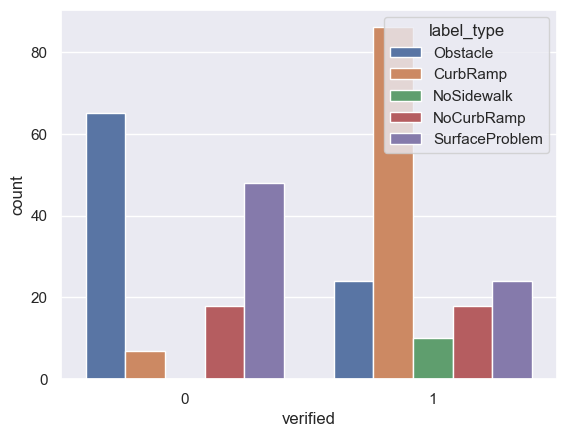

In [112]:
#count plot verified
sns.countplot(x='verified', data=unclassified, hue='label_type')

In [93]:
labels


,label_id,label_type,severity,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,lat,lng,geometry,cluster_id,clustered,cluster_label_count,way_type,distance_to_road,distance_to_intersection,tag,tag_count,description
0,85055,CurbRamp,1.0,NjPAkwTxWsayAq3kCugvdA,1,107.750000,-15.62500,270.556610,0.907036,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618599,-122.332787,POINT (-122.3327865600586 47.61859893798828),166316,0,1,primary,26.840775,59.130699,0.0,0.0,0.0
1,85057,Obstacle,2.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,38.375000,-21.87500,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617805,-122.331886,POINT (-122.3318862915039 47.61780548095703),191230,0,1,tertiary,49.480803,0.000000,0.0,0.0,1.0
2,85059,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,131.187500,-24.50000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617512,-122.331833,POINT (-122.33183288574219 47.61751174926758),152398,1,2,tertiary,22.804907,37.121175,0.0,0.0,0.0
3,85060,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,131.187500,-24.50000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617519,-122.331879,POINT (-122.33187866210938 47.61751937866211),155432,0,1,primary,19.008081,33.832501,0.0,0.0,0.0
4,85062,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,257.187500,-35.00000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617638,-122.332047,POINT (-122.33204650878906 47.617637634277344),148478,0,1,tertiary,22.626325,46.324623,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193037,231270,CurbRamp,1.0,R-sTl5O6sOdVPurgTWy3EQ,1,332.468750,-35.00000,215.130295,-0.157570,155af0a9-4149-4436-8aa3-7573e160036d,47.540771,-122.267258,POINT (-122.26725769042969 47.540771484375),86474,1,2,residential,19.281464,33.457578,0.0,0.0,0.0
193038,231285,NoSidewalk,5.0,N5MrAAtHZO2JGXUrYAYnSQ,3,0.890625,-11.65625,179.161057,-5.825714,155af0a9-4149-4436-8aa3-7573e160036d,47.552292,-122.263443,POINT (-122.26344299316406 47.55229187011719),120452,1,2,residential,7.199212,0.000000,0.0,0.0,0.0
193039,231338,CurbRamp,1.0,d3oBrJ-nDtKMwlE7svc6pg,1,253.562500,-35.00000,177.959915,-0.962440,3ac3d4de-a70a-48ec-b46e-498d6e26ee6c,47.563271,-122.281792,POINT (-122.28179168701172 47.563270568847656),86471,0,1,residential,14.445776,152.820404,0.0,0.0,0.0
193040,231339,CurbRamp,1.0,AOIBJ12BjFanDJF1Ark05Q,1,110.312500,-35.00000,179.365723,-1.093400,3ac3d4de-a70a-48ec-b46e-498d6e26ee6c,47.563469,-122.281654,POINT (-122.28165435791016 47.56346893310547),86461,0,1,residential,20.171446,225.060263,0.0,0.0,0.0


In [32]:
#select label_type = CurbRamp and label_type = NoCurbRamp
all_curbs = labels[labels['label_type'].isin(['CurbRamp', 'NoCurbRamp'])]
all_curbs_correct = correct[correct['label_type'].isin(['CurbRamp', 'NoCurbRamp'])]
all_curbs_incorrect = incorrect[incorrect['label_type'].isin(['CurbRamp', 'NoCurbRamp'])]

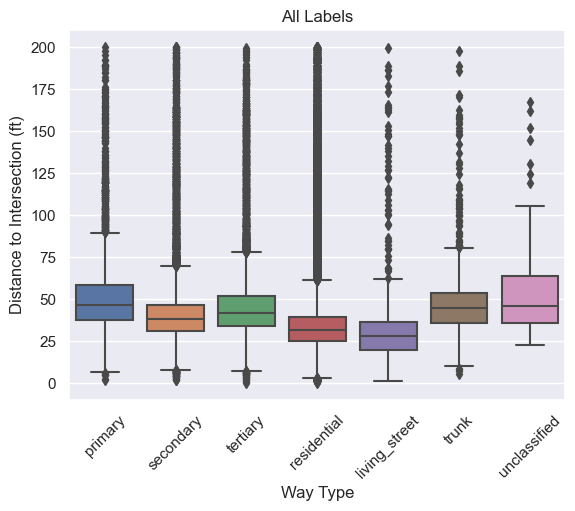

In [26]:
#select distance < 200 ft and do the same plot
distance_to_intersection = all_curbs.loc[(all_curbs['distance_to_intersection']<200)]
# sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="way_type", y="distance_to_intersection", data=distance_to_intersection)
ax.set_title('All Labels')
ax.set_xlabel('Way Type')
ax.set_ylabel('Distance to Intersection (ft)')
#rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set(xticklabels=['primary', 'secondary', 'tertiary', 'residential', 'living_street', 'trunk','unclassified'])
plt.show()

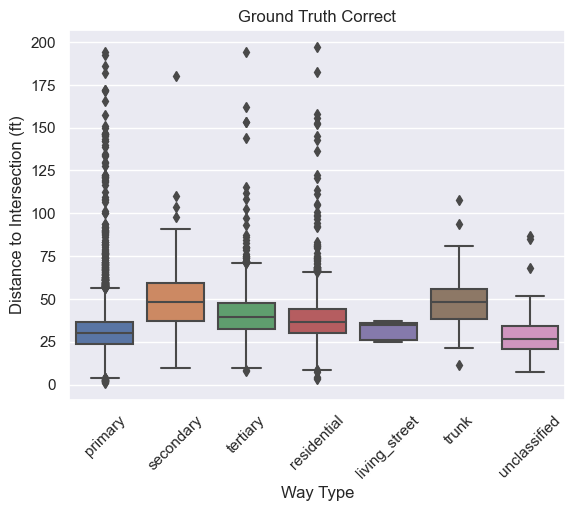

In [25]:
#select distance < 200 ft and do the same plot
distance_to_intersection = all_curbs_correct.loc[(all_curbs_correct['distance_to_intersection']<200)]
# sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="way_type", y="distance_to_intersection", data=distance_to_intersection)
ax.set_title('Ground Truth Correct')
ax.set_xlabel('Way Type')
ax.set_ylabel('Distance to Intersection (ft)')
#rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45)
#set x-xis order 
ax.set(xticklabels=['primary', 'secondary', 'tertiary', 'residential', 'living_street', 'trunk','unclassified'])
plt.show()

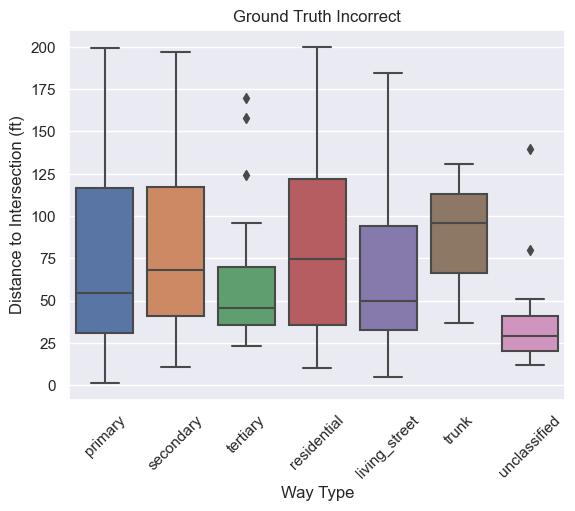

In [34]:
#select distance < 200 ft and do the same plot
distance_to_intersection = all_curbs_incorrect.loc[(all_curbs_incorrect['distance_to_intersection']<200)]
# sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="way_type", y="distance_to_intersection", data=distance_to_intersection)
ax.set_title('Ground Truth Incorrect')
ax.set_xlabel('Way Type')
ax.set_ylabel('Distance to Intersection (ft)')
#rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45)
#set x-xis order 
ax.set(xticklabels=['primary', 'secondary', 'tertiary', 'residential', 'living_street', 'trunk','unclassified'])
plt.show()

In [46]:
othertypes_correct = correct[~correct['label_type'].isin(['CurbRamp', 'NoCurbRamp'])]
othertypes_incorrect = incorrect[~incorrect['label_type'].isin(['CurbRamp', 'NoCurbRamp'])]

In [54]:
problem_correct = correct[correct['label_type'].isin(['SurfaceProblem', 'Obstacle'])]
problem_correct

,label_id,label_type,severity,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,lat,lng,geometry,cluster_id,clustered,cluster_label_count,way_type,distance_to_road,distance_to_intersection,tag,tag_count,description,verified
0,86788,SurfaceProblem,2.0,BpVD1H9f1A6URlrjPUcyZg,1,183.062500,-7.125000,358.678406,6.516869,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.698307,-122.281250,POINT (-122.28125 47.698307037353516),84966,0,1,residential,30.898944,0.0,1.0,1.0,0.0,1
6,191013,Obstacle,3.0,rh4nnshodbvxdcxxi78lgg,3,277.281250,-4.453125,358.721283,-0.788025,288ef01e-3a8c-4e19-95c9-ece363e594ac,47.694077,-122.344780,POINT (-122.34477996826172 47.69407653808594),46132,1,2,primary,34.049590,0.0,1.0,2.0,0.0,1
7,191040,Obstacle,2.0,XXBdcAbYBVFzGqhBNZPPOw,3,140.638397,-9.279017,322.531433,-0.651176,4f8e0679-0b3d-42bb-9cff-e6149f8fdc39,47.550732,-122.265335,POINT (-122.26533508300781 47.55073165893555),129359,0,1,secondary,22.646694,0.0,1.0,1.0,0.0,1
9,191146,SurfaceProblem,3.0,9MR79Wvn4fAl2J_20KRtfw,2,110.377235,-24.551340,178.767334,-1.036240,4f8e0679-0b3d-42bb-9cff-e6149f8fdc39,47.550564,-122.264603,POINT (-122.26460266113281 47.55056381225586),140466,0,1,residential,21.382939,0.0,1.0,2.0,0.0,1
13,191190,SurfaceProblem,2.0,hRVUuUV8pboy5B5gxN505A,2,106.839287,-21.669643,179.395706,7.551758,c1342a0f-dc05-4749-abf8-db4143be33da,47.561016,-122.290901,POINT (-122.29090118408203 47.56101608276367),140256,0,1,residential,31.302372,0.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16334,67536,Obstacle,3.0,ewRkv9rq6q3_aQ9TsmIrQg,3,87.506699,-10.250000,162.594620,-0.309479,c7190807-b56e-40c5-b96e-49dc8368328c,47.534607,-122.360657,POINT (-122.36065673828125 47.53460693359375),187402,0,1,secondary,23.058835,0.0,1.0,1.0,0.0,1
16335,67557,Obstacle,2.0,u-JIuQ6XY9HDQ0UKpocBMQ,2,312.892853,-18.125000,178.513336,-1.109200,c7190807-b56e-40c5-b96e-49dc8368328c,47.667446,-122.304527,POINT (-122.30452728271484 47.66744613647461),80708,0,1,tertiary,25.085219,0.0,1.0,1.0,0.0,1
16336,67686,SurfaceProblem,3.0,wFReCioXt4-gE8X7yCUqpQ,1,131.705353,-23.767857,217.129913,0.391228,0e1ae564-6d72-4670-98e4-71369cc5ab26,47.705086,-122.360718,POINT (-122.3607177734375 47.70508575439453),48198,1,2,residential,15.714241,0.0,0.0,0.0,0.0,1
16337,67742,SurfaceProblem,3.0,pl8P-in6c5YzClHdTvhrUw,1,115.151787,-21.000000,179.201141,1.406380,0e1ae564-6d72-4670-98e4-71369cc5ab26,47.692387,-122.383873,POINT (-122.38387298583984 47.692386627197266),48113,0,1,residential,22.103465,0.0,0.0,0.0,0.0,1


In [52]:
problem_incorrect = incorrect[incorrect['label_type'].isin(['SurfaceProblem', 'Obstacle'])]
problem_incorrect

,label_id,label_type,severity,gsv_panorama_id,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,lat,lng,geometry,cluster_id,clustered,cluster_label_count,way_type,distance_to_road,distance_to_intersection,tag,tag_count,description,verified
1,89703,Obstacle,5.0,kSoHmwB61ZXsiIRUdZgpDQ,2,306.022308,-26.696428,179.077042,-1.690369,d2b04e27-13ce-4aff-a06a-7c7147c96696,47.528141,-122.363274,POINT (-122.36327362060547 47.528141021728516),187325,0,1,residential,22.036575,0.0,1.0,1.0,0.0,0
10,191045,Obstacle,3.0,0Ba7hkghmVmIvM-Rg2izmw,1,51.732498,-32.937500,90.005928,0.173622,890a4023-454c-4acd-a615-2c7526120009,47.553482,-122.334015,POINT (-122.33401489257812 47.55348205566406),190649,0,1,tertiary,22.657490,0.0,1.0,1.0,0.0,0
45,195795,SurfaceProblem,1.0,DS6JOqCCEAmiJxu4Zwrq4Q,1,88.187500,-17.937500,91.170815,-9.654678,75cf9d85-d023-478f-895d-5cac567f0735,47.694927,-122.327515,POINT (-122.3275146484375 47.69492721557617),50785,0,1,residential,24.026806,0.0,1.0,1.0,0.0,0
51,199567,Obstacle,3.0,NfTUgDHQ-woClrKs0YFb_w,1,248.562500,-35.000000,83.095200,2.538116,5f6610ca-59ed-420d-b690-592400975a71,47.550957,-122.290848,POINT (-122.29084777832031 47.55095672607422),129337,0,1,tertiary,19.068629,0.0,1.0,1.0,0.0,0
59,203110,Obstacle,4.0,dQCwEdMaKu3oGo2hM4Maww,1,358.000000,-9.812500,179.212097,-3.426315,1f0bf5c6-4fa0-47d0-b132-79e5724c7bc1,47.699646,-122.323067,POINT (-122.32306671142578 47.69964599609375),43957,0,1,secondary,11.126315,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16310,65404,SurfaceProblem,3.0,a4KKWtv9FrPxKXBQ0NqOSQ,1,303.946442,-30.687500,91.207939,-0.395180,0e1ae564-6d72-4670-98e4-71369cc5ab26,47.721222,-122.303909,POINT (-122.30390930175781 47.721221923828125),83207,0,1,residential,28.134985,0.0,0.0,0.0,0.0,0
16313,65281,SurfaceProblem,3.0,5TVU8BDY3ZtYnRwYnLkFjw,1,49.455357,-17.437500,359.584869,0.085213,86d26e9d-010f-4802-88ba-680ae0a8e20d,47.532719,-122.322701,POINT (-122.32270050048828 47.532718658447266),132912,0,1,unclassified,24.884224,0.0,0.0,0.0,0.0,0
16339,79862,SurfaceProblem,5.0,Tgdv_crZ2G73pDZs8Xo81w,2,295.883942,-15.598214,271.188171,-3.895775,0d3fa400-2504-42c0-9779-b887ce017938,47.701439,-122.339066,POINT (-122.33906555175781 47.701438903808594),48093,0,1,living_street,10.040991,0.0,1.0,1.0,1.0,0
16340,79880,SurfaceProblem,2.0,D5wUl-EWRUD5bl8H1fDd-Q,2,289.812500,-10.892858,269.897766,-1.949219,0d3fa400-2504-42c0-9779-b887ce017938,47.701462,-122.340805,POINT (-122.34080505371094 47.70146179199219),48071,0,1,living_street,17.490673,0.0,1.0,3.0,0.0,0


In [ ]:
all_curbs_incorrect.loc[(all_curbs_incorrect['distance_to_intersection']<200)]

In [ ]:
#from correct select label_type = obstacle, way_type =primary
correct = correct[correct['label_type'] == 'obstacle']
correct = correct[correct['way_type'] == 'primary']

In [99]:
[['label_type'] == 'Obstacle']

[False]

In [102]:
way_type_list = gt['way_type'].unique().tolist()

In [106]:
obstacles_correct = correct[correct['label_type'] == 'Obstacle']
obstacles_incorrect = incorrect[incorrect['label_type'] == 'Obstacle']
for i in way_type_list:
    sns.histplot(data=obstacles_correct.loc[(obstacles_correct['way_type']== i)], x="distance_to_road", bins=100, kde=True, color="green")
    sns.histplot(data=obstacles_incorrect.loc[(obstacles_incorrect['way_type']== i)], x="distance_to_road", bins=100, kde=True, color="red")
    plt.title('Obstacle labels distance to ' + i )
    plt.savefig('figures/obstacle_distance_to_' + i + '.png')
    plt.close() 
    


In [108]:
surfaceproblems_correct = correct[correct['label_type'] == 'SurfaceProblem']
surfaceproblems_incorrect = incorrect[incorrect['label_type'] == 'SurfaceProblem']
for i in way_type_list:
    sns.histplot(data=surfaceproblems_correct.loc[(surfaceproblems_correct['way_type']== i)], x="distance_to_road", bins=100, kde=True, color="green")
    sns.histplot(data=surfaceproblems_incorrect.loc[(surfaceproblems_incorrect['way_type']== i)], x="distance_to_road", bins=100, kde=True, color="red")
    plt.title('Surface Problem labels distance to ' + i )
    plt.savefig('figures/surface_distance_to_' + i + '.png')
    plt.close() 
    

In [82]:
#put gt unique label_type values to a list
label_types = gt['label_type'].unique().tolist()

In [83]:
label_types

['SurfaceProblem', 'Obstacle', 'CurbRamp', 'NoCurbRamp', 'NoSidewalk']

In [92]:
for i in label_types:
    sns.countplot(data=gt.loc[(gt['label_type']== i)], x="cluster_label_count", hue='verified')
    plt.title('Number of labels within a cluster for ' + i )
    plt.savefig('figures/cluster_label_count_' + i + '.png')
    plt.close() 

<AxesSubplot: xlabel='cluster_label_count', ylabel='count'>

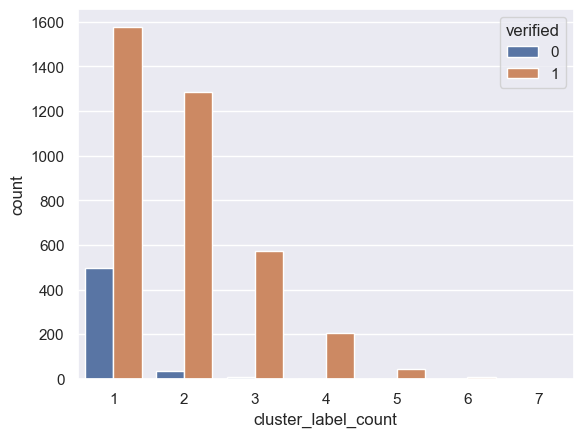

In [91]:
#histplot of distance to road from problem_incorrect and problem_correct
sns.countplot(data=gt.loc[(gt['label_type']== 'NoCurbRamp')], x="cluster_label_count", hue='verified')

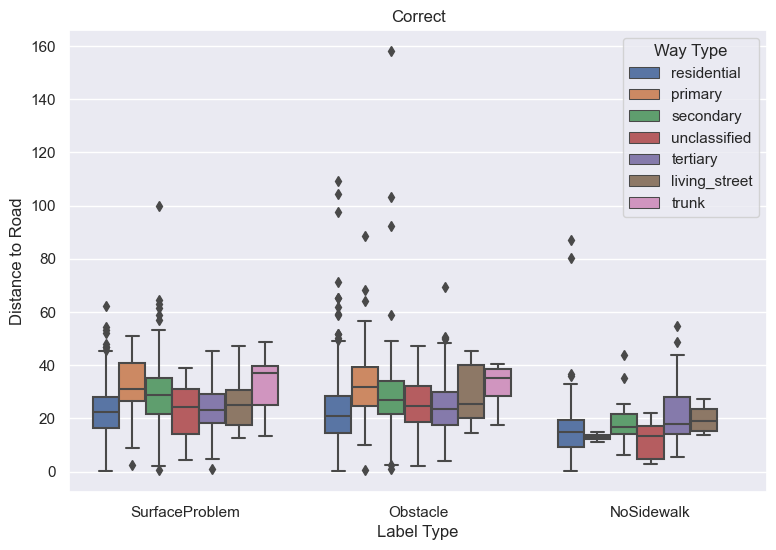

In [68]:

plt.figure(figsize=(9, 6))# Create the box plot
sns.boxplot(data=othertypes_correct, x='label_type', y='distance_to_road', hue='way_type')

# Add labels and title
plt.xlabel('Label Type')
plt.ylabel('Distance to Road')
plt.title('Correct')

plt.legend(title='Way Type')  # Add a legend with the title for way_type

plt.show()  # Display the plot

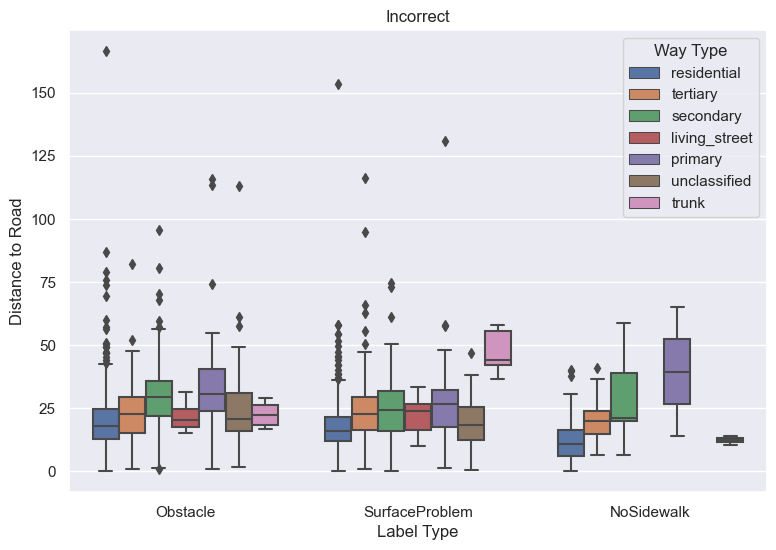

In [50]:
plt.figure(figsize=(9, 6))# Create the box plot
sns.boxplot(data=othertypes_incorrect, x='label_type', y='distance_to_road', hue='way_type')

# Add labels and title
plt.xlabel('Label Type')
plt.ylabel('Distance to Road')
plt.title('Incorrect')

plt.legend(title='Way Type')  # Add a legend with the title for way_type

plt.show()  # Display the plot

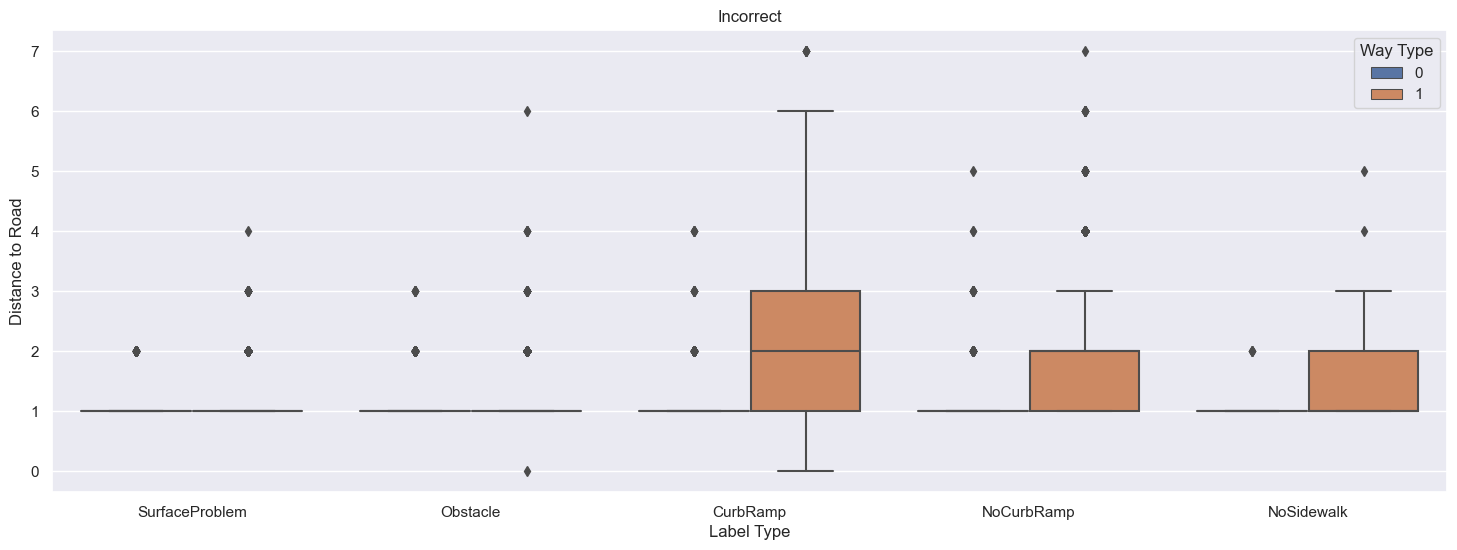

In [70]:
plt.figure(figsize=(18, 6))# Create the box plot
sns.boxplot(data=gt, x='label_type', y='cluster_label_count', hue='verified')

# Add labels and title
plt.xlabel('Label Type')
plt.ylabel('Distance to Road')
plt.title('Incorrect')

plt.legend(title='Way Type')  # Add a legend with the title for way_type

plt.show()  # Display the plot

In [113]:
osm_roads = gpd.read_file('data/osm/osm-roads/osm-roads-main-types/osm-roads-main-types.shp')

In [117]:
osm_roads [osm_roads['highway'] =='unclassified'].explore(tiles='cartodbpositron')